# Mad Max's Journey to the Title. Max Verstappen vs Lewis Hamilton

![](https://lh3.googleusercontent.com/THbrMwV_5p_WTumGzkCJpYz8UlElGpXk8HTPmCL3jdAsRMrO9MacvMbuevysfIlE_NSFiaQ5tUWuF5uYiYQcdo99OLNy7HA=s1349)

`"This Race started with Controversy has ended with Controversy"`

Following the controversial win by Max Verstappen in the final moments of the Abu Dhabi Grand Prix. This project explores different statistics of both the drivers Max & Lewis Hamilton.

The data is extracted from the F1 2021 championship wikipedia page. First we will extract the data-tables from the wikipedia web pages and after that we will extract the required data tables in data-frames format. After some data cleaning and data preparation, we will try to analyze the tables keeping in eye the two key drivers Max and Lewis

Let's begin by importing libraries 

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Dataset
We will download/extract our dataset from `Wikipedia`. For this we will use `requests` library.
For extracting data, first we load the data-frames of each url in a list and after that we assign required tables from each data-frame to different list `season`.

Urls of the web pages from which the data will be acquired

In [2]:
final_season_result_url = 'https://en.wikipedia.org/wiki/2021_Formula_One_World_Championship'
urls=['https://en.wikipedia.org/wiki/2021_Bahrain_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Emilia_Romagna_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Portuguese_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Spanish_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Monaco_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Azerbaijan_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_French_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Styrian_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Austrian_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_British_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Hungarian_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Belgian_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Dutch_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Italian_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Russian_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Turkish_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_United_States_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Mexico_City_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_S%C3%A3o_Paulo_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Qatar_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Saudi_Arabian_Grand_Prix',
      'https://en.wikipedia.org/wiki/2021_Abu_Dhabi_Grand_Prix']

In [3]:
#Data reading from the web pages
df=[pd.read_html(requests.get(final_season_result_url).content)]
for url in urls:
    df.append(pd.read_html(requests.get(url).content))

In [4]:
#Creating a array of required data frames
season=[]
for dataframes in df:
    race=dict(qual=dataframes[2],race=dataframes[3])
    season.append(race)

Correction for some races as there were `sprint races` held in some GPs (GP 10, 14 ,19).

In [5]:
season[10]['qual']=df[10][3];season[10]['race']=df[10][5];season[10]['sprint']=df[10][4]
season[12]['qual']=df[12][3];season[12]['race']=df[12][4]
season[14]['race']=df[14][4];season[14]['sprint']=df[14][3]
season[19]['race']=df[19][4];season[19]['sprint']=df[19][3]

## Data Preparation & Cleaning 
Our data contains 4 types of data-frames: Season Overview, Qualifying, Final Race and Sprint Race for some races. We removed some columns and row entries which were of no use, using `drop` command. Also we changed the column names. After that we handled some exception cases in data entries. We concluded this process with changing the data types of columns to suitable data types using `astype`.

In the season overview data-frame, we removed the column of report and also the last row entry.

In [6]:
season[0]['race'].drop(columns=['.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Report'],inplace=True)
season[0]['race'].drop([22],axis=0,inplace=True)
season[0]['race'].columns=['Round','Grand_Prix','Pole_Position','Fastest_Lap','Winning_Driver','Winning_Constructor']

In [7]:
season[0]['race'].at[4,'Pole_Position']='Charles Leclerc';
season[0]['race'].at[11,'Fastest_Lap']='None Recognised';
season[0]['race'].at[13,'Pole_Position']='Max Verstappen';
season[0]['race'].at[15,'Pole_Position']='Valtteri Bottas'

### Qualifying Data Cleaning
We removed the first column and also changed the name of columns along with correction in data entries also.

Removing the first column and also 2 rows which are of no use to us.

In [8]:
temp=[2,5,11]
for i in temp:
    season[i]['qual'].drop([19,21],axis=0,inplace=True); season[i]['qual']=season[i]['qual'].reset_index()
    season[i]['qual'].drop(columns=['.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Pos.','index'],inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [9]:
temp=[6,7]
for i in temp:
    season[i]['qual'].drop([18,21],axis=0,inplace=True); season[i]['qual']=season[i]['qual'].reset_index()
    season[i]['qual'].drop(columns=['.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Pos.','index'],inplace=True)

In [10]:
temp=[1,3,4,8,9,10,12,13,14,15,16,17,18,19,20,21,22]
for i in temp:
    season[i]['qual'].drop(columns=['.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Pos.'],inplace=True)
    season[i]['qual'].drop([20,21],axis=0,inplace=True)

Changing the Column names of the qualifying data-frame

In [11]:
temp=[1,2,3,4,5,6,7,8,9,11,12,13,15,16,17,18,19,20,21,22]
for i in temp:
    season[i]['qual'].columns=['No','Driver','Constructor','Q1','Q2','Q3','Finalgrid']

In [12]:
#Sprint Race GP
temp=[10,14,19]
for i in temp:
    season[i]['qual'].columns=['No','Driver','Constructor','Q1','Q2','Q3','SQgrid']

Editing Some data in specific qualifying data-frames, such as correcting name of `Nikita Mazepin` and modifying some data in `Finalgrid`

In [13]:
season[1]['qual'].at[17,'Finalgrid']=20;season[1]['qual'].at[19,'Driver']='Nikita Mazepin'
season[2]['qual'].at[19,'Finalgrid']=20;season[2]['qual'].at[18,'Driver']='Nikita Mazepin'
season[3]['qual'].at[19,'Driver']='Nikita Mazepin'
season[4]['qual'].at[19,'Finalgrid']=20;season[4]['qual'].at[19,'Driver']='Nikita Mazepin'
season[5]['qual'].at[19,'Finalgrid']=20;season[5]['qual'].at[18,'Driver']='Nikita Mazepin'
season[6]['qual'].at[5,'Finalgrid']=9;season[6]['qual'].at[18,'Finalgrid']=19;season[6]['qual'].at[19,'Finalgrid']=20;season[6]['qual'].at[17,'Driver']='Nikita Mazepin'
season[7]['qual'].at[17,'Driver']='Nikita Mazepin';season[7]['qual'].at[18,'Finalgrid']=19;season[7]['qual'].at[19,'Finalgrid']='PL'
season[8]['qual'].at[1,'Finalgrid']=5;season[8]['qual'].at[7,'Finalgrid']=11;season[8]['qual'].at[19,'Driver']='Nikita Mazepin'
season[9]['qual'].at[19,'Driver']='Nikita Mazepin';season[9]['qual'].at[7,'Finalgrid']=11
season[10]['qual'].at[19,'Driver']='Nikita Mazepin'
season[11]['qual'].at[18,'Driver']='Nikita Mazepin';season[11]['qual'].at[19,'Finalgrid']=20
season[12]['qual'].at[7,'Finalgrid']=13;season[12]['qual'].at[9,'Finalgrid']=15;season[12]['qual'].at[14,'Finalgrid']=19;season[12]['qual'].at[18,'Finalgrid']='PL';season[12]['qual'].at[19,'Driver']='Nikita Mazepin'
season[13]['qual'].at[19,'Driver']='Nikita Mazepin';season[13]['qual'].at[13,'Finalgrid']='PL';season[13]['qual'].at[15,'Finalgrid']='PL'
season[14]['qual'].at[19,'Driver']='Nikita Mazepin'
season[15]['qual'].at[18,'Driver']='Nikita Mazepin';season[15]['qual'].at[6,'Finalgrid']=16;season[15]['qual'].at[13,'Finalgrid']=18;season[15]['qual'].at[14,'Finalgrid']=19;season[15]['qual'].at[17,'Finalgrid']=17;season[15]['qual'].at[19,'Finalgrid']=20
season[16]['qual'].at[19,'Driver']='Nikita Mazepin';season[16]['qual'].at[0,'Finalgrid']=11;season[16]['qual'].at[14,'Finalgrid']=19;season[16]['qual'].at[15,'Finalgrid']=20;
season[17]['qual'].at[19,'Driver']='Nikita Mazepin';season[17]['qual'].at[3,'Finalgrid']=9;season[17]['qual'].at[11,'Finalgrid']=18;season[17]['qual'].at[13,'Finalgrid']=19;season[17]['qual'].at[14,'Finalgrid']=20;
season[18]['qual'].at[18,'Driver']='Nikita Mazepin';season[18]['qual'].at[8,'Finalgrid']=17;season[18]['qual'].at[9,'Finalgrid']=18;season[18]['qual'].at[12,'Finalgrid']=16;season[18]['qual'].at[14,'Finalgrid']=19;season[18]['qual'].at[19,'Finalgrid']=20;
season[19]['qual'].at[18,'Driver']='Nikita Mazepin';season[19]['qual'].at[19,'SQgrid']=20
season[20]['qual'].at[19,'Driver']='Nikita Mazepin';season[20]['qual'].at[1,'Finalgrid']=7;season[20]['qual'].at[2,'Finalgrid']=6;
season[21]['qual'].at[19,'Driver']='Nikita Mazepin';
season[22]['qual'].at[19,'Driver']='Nikita Mazepin';season[22]['qual'].at[19,'Finalgrid']=-1

### Sprint Race Data Correction
Removed the last two row entries and some minor correction in data entries

In [14]:
temp=[10,14,19]
for i in temp:
    season[i]['sprint'].drop([20,21],axis=0,inplace=True)

Correction in the name of `Nikita Mazepin` and some other data in `Finalgrid` column

In [15]:
season[10]['sprint'].at[8,'Finalgrid']=12;season[10]['sprint'].at[18,'Driver']='Nikita Mazepin';season[10]['sprint'].at[19,'Finalgrid']='PL'
season[14]['sprint'].at[0,'Finalgrid']=19;season[14]['sprint'].at[16,'Driver']='Nikita Mazepin';season[14]['sprint'].at[19,'Finalgrid']='PL'
season[19]['sprint'].at[4,'Finalgrid']=10;season[19]['sprint'].at[17,'Finalgrid']='PL';season[19]['sprint'].at[19,'Driver']='Nikita Mazepin';

### Final Race Data Preparation and Cleaning
Removed the last two rows and some other minor data entry corrections followed by changing the column names.

In [16]:
for i in range(1,23):
    season[i]['race'].drop([20,21],axis=0,inplace=True)

Changing the columns name

In [17]:
for i in range(1,23):
    season[i]['race'].columns=['Pos','No','Driver','Constructor','Laps','Time/Retired','Grid','Points']

Correcting the name of `Nikita Mazepin` and some other data entries

In [18]:
season[1]['race'].at[2,'Points']=16;season[1]['race'].at[4,'Grid']='PL';season[1]['race'].at[19,'Driver']='Nikita Mazepin';
season[1]['race'].at[16,'Pos']=17;season[1]['race'].at[17,'Pos']=18;
season[2]['race'].at[1,'Points']=19;season[2]['race'].at[14,'Grid']='PL';season[2]['race'].at[16,'Driver']='Nikita Mazepin';
season[2]['race'].at[14,'Pos']=15
season[3]['race'].at[2,'Points']=16;season[3]['race'].at[18,'Driver']='Nikita Mazepin';
season[4]['race'].at[1,'Points']=19;season[4]['race'].at[18,'Driver']='Nikita Mazepin';
season[5]['race'].at[6,'Points']=7;season[5]['race'].at[16,'Driver']='Nikita Mazepin';
season[6]['race'].at[16,'Pos']=17;season[6]['race'].at[17,'Pos']=18;season[6]['race'].at[13,'Driver']='Nikita Mazepin';
season[7]['race'].at[0,'Points']=26;season[7]['race'].at[19,'Driver']='Nikita Mazepin';
season[8]['race'].at[1,'Points']=19;season[8]['race'].at[17,'Driver']='Nikita Mazepin';
season[9]['race'].at[0,'Points']=26;season[9]['race'].at[16,'Pos']=17;season[9]['race'].at[18,'Driver']='Nikita Mazepin';
season[10]['race'].at[16,'Driver']='Nikita Mazepin';
season[11]['race'].at[4,'Points']=11;season[11]['race'].at[12,'Grid']='PL';season[11]['race'].at[13,'Driver']='Nikita Mazepin';
season[12]['race'].at[16,'Driver']='Nikita Mazepin';season[12]['race'].at[18,'Grid']='PL';
season[13]['race'].at[1,'Points']=19;season[13]['race'].at[16,'Pos']=17;season[13]['race'].at[19,'Driver']='Nikita Mazepin';
season[14]['race'].at[0,'Points']=26;season[14]['race'].at[15,'Driver']='Nikita Mazepin';
season[15]['race'].at[6,'Points']=7;season[15]['race'].at[18,'Pos']=19;season[15]['race'].at[17,'Driver']='Nikita Mazepin';
season[16]['race'].at[0,'Points']=26;season[16]['race'].at[19,'Driver']='Nikita Mazepin';
season[17]['race'].at[1,'Points']=19;season[17]['race'].at[16,'Driver']='Nikita Mazepin';
season[18]['race'].at[17,'Driver']='Nikita Mazepin';
season[19]['race'].at[3,'Points']=13;season[19]['race'].at[16,'Driver']='Nikita Mazepin';
season[20]['race'].at[1,'Points']=19;season[20]['race'].at[17,'Driver']='Nikita Mazepin';
season[21]['race'].at[0,'Points']=26;season[21]['race'].at[17,'Driver']='Nikita Mazepin';
season[22]['race'].at[0,'Points']=26;season[22]['race'].at[14,'Pos']=15;season[22]['race'].at[19,'Driver']='Nikita Mazepin';

The final race data has been corrected and ready to use

### Data Conversion

In [19]:
# overall season data-frame
season[0]['race']=season[0]['race'].astype({"Round":"int64","Grand_Prix":"string","Pole_Position":"string","Fastest_Lap":"string","Winning_Driver":"string","Winning_Constructor":"string"},errors='ignore')

In [20]:
temp=[1,2,3,4,5,6,7,8,9,11,12,13,15,16,17,18,20,21,22]
for i in temp:
    season[i]['qual']=season[i]['qual'].astype({"No":"int64","Driver":"string","Constructor":"string","Finalgrid":"float64"},errors='ignore')
    season[i]['race']=season[i]['race'].astype({"Pos":"int64","No":"int64","Driver":"string","Constructor":"string","Laps":"float64","Grid":"int64","Points":"float64"},errors='ignore')

In [21]:
temp=[10,14,19]
for i in temp:
    season[i]['qual']=season[i]['qual'].astype({"No":"int64","Driver":"string","Constructor":"string","SQgrid":"float64"},errors='ignore')
    season[i]['sprint']=season[i]['sprint'].astype({"Pos.":"int64","No.":"int64","Driver":"string","Constructor":"string","Laps":"float64","Grid":"int64","Points":"float64","Finalgrid":"int64"},errors='ignore')
    season[i]['race']=season[i]['race'].astype({"Pos":"int64","No":"int64","Driver":"string","Constructor":"string","Laps":"float64","Grid":"int64","Points":"float64"},errors='ignore')

### Creating some other datasets for further use

In [22]:
maxvslewis_pts_df=season[0]['race'][['Round','Grand_Prix']].copy()

In [23]:
#Qualifying Position Data
temp=[1,2,3,4,5,6,7,8,9,11,12,13,15,16,17,18,20,21,22]
for r in temp:
    for i in range(0,20):
        count=0
        if season[r]['qual'].Driver[i]=='Max Verstappen':
            if season[r]['qual'].Finalgrid[i]=='PL':
                maxvslewis_pts_df.at[r-1,"Max_Qual"]=20
            else:
                maxvslewis_pts_df.at[r-1,"Max_Qual"]=season[r]['qual'].Finalgrid[i]
            count=count+1
        if season[r]['qual'].Driver[i]=='Lewis Hamilton':
            if season[r]['qual'].Finalgrid[i]=='PL':
                maxvslewis_pts_df.at[r-1,"Lewis_Qual"]=20
            else:
                maxvslewis_pts_df.at[r-1,"Lewis_Qual"]=season[r]['qual'].Finalgrid[i]
            count=count+1
        if count>=2:
            break

In [24]:
temp=[10,14,19]
for r in temp:
    for i in range(0,20):
        count=0
        if season[r]['qual'].Driver[i]=='Max Verstappen':
            if season[r]['qual'].SQgrid[i]=='PL':
                maxvslewis_pts_df.at[r-1,"Max_Qual"]=20
            else:
                maxvslewis_pts_df.at[r-1,"Max_Qual"]=season[r]['qual'].SQgrid[i]
            count=count+1
        if season[r]['qual'].Driver[i]=='Lewis Hamilton':
            if season[r]['qual'].SQgrid[i]=='PL':
                maxvslewis_pts_df.at[r-1,"Lewis_Qual"]=20
            else:
                maxvslewis_pts_df.at[r-1,"Lewis_Qual"]=season[r]['qual'].SQgrid[i]
            count=count+1
        if count>=2:
            break

In [25]:
# final race data
for r in range(1,23):
    for i in range(0,20):
        count=0;
        if season[r]['race'].Driver[i]=='Max Verstappen':
            if season[r]['race'].Pos[i]=='Ret':
                maxvslewis_pts_df.at[r-1,"Max_Pos"]=20
            else:
                maxvslewis_pts_df.at[r-1,"Max_Pos"]=season[r]['race'].Pos[i]
            
            if season[r]['race'].Points[i]=='Nan':
                maxvslewis_pts_df.at[r-1,"Max_Pts"]=0
            else:
                maxvslewis_pts_df.at[r-1,"Max_Pts"]=season[r]['race'].Points[i]
            
            count=count+1;
        
        if season[r]['race'].Driver[i]=='Lewis Hamilton':
            if season[r]['race'].Pos[i]=='Ret':
                maxvslewis_pts_df.at[r-1,"Lewis_Pos"]=20
            else:
                maxvslewis_pts_df.at[r-1,"Lewis_Pos"]=season[r]['race'].Pos[i]
            
            if season[r]['race'].Points[i]=='Nan':
                maxvslewis_pts_df.at[r-1,"Lewis_Pts"]=0
            else:
                maxvslewis_pts_df.at[r-1,"Lewis_Pts"]=season[r]['race'].Points[i]
            
            count=count+1;
        
        if count>=2:
            break

In [26]:
# sprint race data updation
temp=[10,14,19]
for i in temp:
    for j in range(0,20):
        count=0
        if season[i]['sprint'].Driver[j]=='Max Verstappen':
            if math.isnan(season[i]['sprint'].Points[j]):
                maxvslewis_pts_df.at[i-1,"Max_Pts"]=maxvslewis_pts_df.Max_Pts[i-1]
            elif math.isnan(maxvslewis_pts_df.Max_Pts[i-1]):
                maxvslewis_pts_df.at[i-1,"Max_Pts"]=season[i]['sprint'].Points[j]
            else:
                maxvslewis_pts_df.at[i-1,"Max_Pts"]=maxvslewis_pts_df.Max_Pts[i-1]+season[i]['sprint'].Points[j]
            count=count+1
        if season[i]['sprint'].Driver[j]=='Lewis Hamilton':
            if math.isnan(season[i]['sprint'].Points[j]):
                maxvslewis_pts_df.at[i-1,"Lewis_Pts"]=maxvslewis_pts_df.Lewis_Pts[i-1]
            elif math.isnan(maxvslewis_pts_df.Lewis_Pts[i-1]):
                maxvslewis_pts_df.at[i-1,"Lewis_Pts"]=season[i]['sprint'].Points[j]
            else:
                maxvslewis_pts_df.at[i-1,"Lewis_Pts"]=maxvslewis_pts_df.Lewis_Pts[i-1]+season[i]['sprint'].Points[j]
            count=count+1
        if count>=2:
            break

In [27]:
maxvslewis_pts_df['Lewis_Pts']=maxvslewis_pts_df.Lewis_Pts.fillna(0)
maxvslewis_pts_df['Max_Pts']=maxvslewis_pts_df.Max_Pts.fillna(0)
maxvslewis_pts_df["Lewis_Pts_cum"]=maxvslewis_pts_df.Lewis_Pts.cumsum()
maxvslewis_pts_df["Max_Pts_cum"]=maxvslewis_pts_df.Max_Pts.cumsum()
maxvslewis_pts_df=maxvslewis_pts_df.astype({"Lewis_Pos":"int64","Max_Pos":"int64"},errors='ignore')

### Data Summary

There were total `22 GPs` held in `F1 2021` season. Out of which there were only `3 GPs` in which `sprint races` were held. `(GP 10, 14 ,19)`. We have a total of `22 qualifying` data-frames, `22 final race` data-frames and `3 sprint race` data-frames. Also we have a season overview data-frame. So. in total we have `46 data-frames`. Any other data-frame is derived from these data-frames

Further we have created some more data-frames derived from these above stated data-frames.

## Exploratory Analysis and Visualization
![](https://lh3.googleusercontent.com/cVM95w1ZMI3wJov2-gjgdCPuoHvr_XBFHiJDeV80AxNJtu2v2kPTKVs655b7IsyW00oAbs_2cWAosulaJLMv=w1366-h657-rw)

### Overview of the Dataset
These are the 4 type of data-frames which will be used in getting insights and visualizing the data.

In [28]:
season[0]['race'].head()

,Round,Grand_Prix,Pole_Position,Fastest_Lap,Winning_Driver,Winning_Constructor
0,1,Bahrain Grand Prix,Max Verstappen,Valtteri Bottas,Lewis Hamilton,Mercedes
1,2,Emilia Romagna Grand Prix,Lewis Hamilton,Lewis Hamilton,Max Verstappen,Red Bull Racing-Honda
2,3,Portuguese Grand Prix,Valtteri Bottas,Valtteri Bottas,Lewis Hamilton,Mercedes
3,4,Spanish Grand Prix,Lewis Hamilton,Max Verstappen,Lewis Hamilton,Mercedes
4,5,Monaco Grand Prix,Charles Leclerc,Lewis Hamilton,Max Verstappen,Red Bull Racing-Honda


In [29]:
season[1]['qual'].head()

,No,Driver,Constructor,Q1,Q2,Q3,Finalgrid
0,33,Max Verstappen,Red Bull Racing-Honda,1:30.499,1:30.318,1:28.997,1.0
1,44,Lewis Hamilton,Mercedes,1:30.617,1:30.085,1:29.385,2.0
2,77,Valtteri Bottas,Mercedes,1:31.200,1:30.186,1:29.586,3.0
3,16,Charles Leclerc,Ferrari,1:30.691,1:30.010,1:29.678,4.0
4,10,Pierre Gasly,AlphaTauri-Honda,1:30.848,1:30.513,1:29.809,5.0


In [30]:
season[10]['sprint'].head()

,Pos.,No.,Driver,Constructor,Laps,Time/Retired,Grid,Points,Finalgrid
0,1,33,Max Verstappen,Red Bull Racing-Honda,17.0,25:38.426,2,3.0,1
1,2,44,Lewis Hamilton,Mercedes,17.0,+1.430,1,2.0,2
2,3,77,Valtteri Bottas,Mercedes,17.0,+7.502,3,1.0,3
3,4,16,Charles Leclerc,Ferrari,17.0,+11.278,4,NaN,4
4,5,4,Lando Norris,McLaren-Mercedes,17.0,+24.111,6,NaN,5


In [31]:
season[1]['race'].head()

,Pos,No,Driver,Constructor,Laps,Time/Retired,Grid,Points
0,1,44,Lewis Hamilton,Mercedes,56.0,1:32:03.897,2,25.0
1,2,33,Max Verstappen,Red Bull Racing-Honda,56.0,+0.745,1,18.0
2,3,77,Valtteri Bottas,Mercedes,56.0,+37.383,3,16.0
3,4,4,Lando Norris,McLaren-Mercedes,56.0,+46.466,7,12.0
4,5,11,Sergio Pérez,Red Bull Racing-Honda,56.0,+52.047,PL,10.0


### Analyzing the Overall Season Statistics

In [32]:
season[0]['race'].head()

,Round,Grand_Prix,Pole_Position,Fastest_Lap,Winning_Driver,Winning_Constructor
0,1,Bahrain Grand Prix,Max Verstappen,Valtteri Bottas,Lewis Hamilton,Mercedes
1,2,Emilia Romagna Grand Prix,Lewis Hamilton,Lewis Hamilton,Max Verstappen,Red Bull Racing-Honda
2,3,Portuguese Grand Prix,Valtteri Bottas,Valtteri Bottas,Lewis Hamilton,Mercedes
3,4,Spanish Grand Prix,Lewis Hamilton,Max Verstappen,Lewis Hamilton,Mercedes
4,5,Monaco Grand Prix,Charles Leclerc,Lewis Hamilton,Max Verstappen,Red Bull Racing-Honda


##### Objective:
>Total Number of Races in 2021 Season

In [33]:
print("A total of {} Grand Prixes were held in 2021 season".format(season[0]['race'].shape[0]))
# total_gps,c=season[0]['race'].shape

A total of 22 Grand Prixes were held in 2021 season


##### Objective: 
>The driver with most number of wins and also the constructor with most wins.

In [34]:
season[0]['race'].groupby('Winning_Driver').size().sort_values(ascending=False)
#Total_race_wins_driver_df=season[0]['race'].groupby('Winning_Driver')[['Round']].count().sort_values('Round',ascending=False)
#Total_race_wins_driver_df.columns=['Count']
#Total_race_wins_driver_df

Winning_Driver
Max Verstappen      10
Lewis Hamilton       8
Daniel Ricciardo     1
Esteban Ocon         1
Sergio Pérez         1
Valtteri Bottas      1
dtype: int64

In [35]:
construct=season[0]['race'].groupby('Winning_Constructor').size().sort_values(ascending=False)
construct

Winning_Constructor
Red Bull Racing-Honda    11
Mercedes                  9
Alpine-Renault            1
McLaren-Mercedes          1
dtype: int64

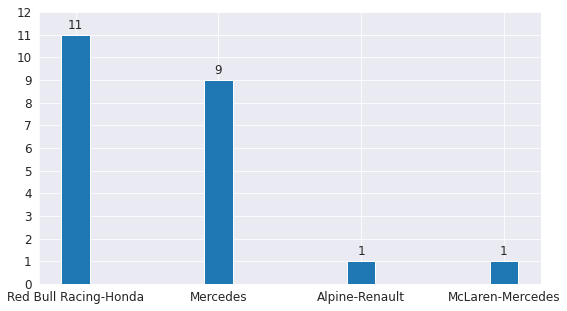

In [59]:
temp=list(construct.index)
x = np.arange(0,13)
plt.bar_label(plt.bar(temp,construct,width,label='Pole Position'),padding=3)
plt.yticks(x);

**Conclusion:** 
> We can see that **`Max Verstappen`** won the most races (10 Race Wins) followed by **`Lewis Hamilton`** (8 Race Wins)

> **`Red Bull Racing-Honda`** won the most races with 11 race wins followed by **`Mercedes`** with 9 race wins

##### Objective: 
>The driver with most number of fastest laps

In [37]:
season[0]['race'].groupby('Fastest_Lap').size().sort_values(ascending=False)

Fastest_Lap
Lewis Hamilton      6
Max Verstappen      6
Valtteri Bottas     4
Sergio Pérez        2
Daniel Ricciardo    1
Lando Norris        1
None Recognised     1
Pierre Gasly        1
dtype: int64

**Conclusion:**
> `Lewis Hamilton` and `Max Verstappen` both claims the most number of fastest lap in the final race of the GP.


##### Objective: 
>How many drivers claims the pole position in penultimate stage of Qualifying session? Whether a pole position holder wins the race or not?

In [38]:
count=0
for i in range(0,22):
    if(season[0]['race'].Pole_Position[i]==season[0]['race'].Winning_Driver[i]):
        count=count+1;
        
print("Out of 22 races, the total races in which a pole position holder wins the race are {}, implying that only {:.0f}% races were won by the pole position holders".format(count,(count/22)*100))

Out of 22 races, the total races in which a pole position holder wins the race are 11, implying that only 50% races were won by the pole position holders


In [61]:
overall_final_df=season[0]['race'].copy()
overall_final_df['pole_won']=(overall_final_df.Pole_Position==overall_final_df.Winning_Driver)

In [63]:
temp1_df=season[0]['race'].groupby('Pole_Position').size().sort_values(ascending=False)
temp1_df

Pole_Position
Max Verstappen     10
Lewis Hamilton      5
Valtteri Bottas     4
Charles Leclerc     2
Lando Norris        1
dtype: int64

In [64]:
temp2_df=overall_final_df.groupby('Pole_Position')[['pole_won']].sum().sort_values('pole_won',ascending=False)
temp2_df

,pole_won
Pole_Position,
Max Verstappen,7
Lewis Hamilton,3
Valtteri Bottas,1
Charles Leclerc,0
Lando Norris,0


**Conclusion:**
> We can see that `Max Verstappen` is the lead pole position holder with 10 pole positions followed by `Lewis Hamilton` with 5 pole positions. However, we can see that out of 10 pole positions for `Max`, he won in only 7 races. Similarly, out of 5 pole positions for `Lewis`, he won in only 3 races.

**Visualization**

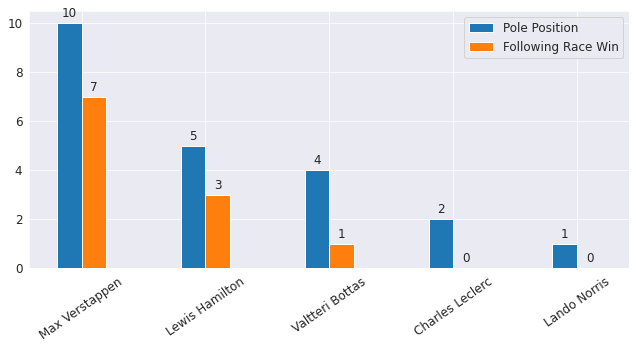

In [42]:
temp3=list(temp1_df.index)
width=0.20;
x = np.arange(len(temp3))
plt.bar_label(plt.bar(x-width/2,temp1_df,width,label='Pole Position'),padding=3)
plt.bar_label(plt.bar(x+width/2,temp2_df.pole_won,width,label='Following Race Win'),padding=3);
plt.legend()
plt.xticks(x,temp3,rotation=35)
plt.tight_layout()
#plt.xlabel('Drivers');

### Analyzing the whole season in detail for Mad Max & Billion Dollar Man

##### Objective:
> Total points scored by both drivers (Max & Lewis)

In [43]:
print("Total points for Max Verstappen after final GP: {}".format(maxvslewis_pts_df.Max_Pts.sum()))
print("Total points for Lewis Hamilton after final GP: {}".format(maxvslewis_pts_df.Lewis_Pts.sum()))

Total points for Max Verstappen after final GP: 395.5
Total points for Lewis Hamilton after final GP: 387.5


**Conclusion:**
> Max Verstappen: `395.5` Points

> Lewis Hamilton: `387.5` Points

##### Objective: 
> Comparing total number of pole positions, podiums, wins for Max & Lewis

In [44]:
Max_temp=[maxvslewis_pts_df.Max_Qual[maxvslewis_pts_df.Max_Qual==1].count(),maxvslewis_pts_df.Max_Pos[maxvslewis_pts_df.Max_Pos<=3].count(),maxvslewis_pts_df.Max_Pos[maxvslewis_pts_df.Max_Pos==1].count()]
Lewis_temp=[maxvslewis_pts_df.Lewis_Qual[maxvslewis_pts_df.Lewis_Qual==1].count(),maxvslewis_pts_df.Lewis_Pos[maxvslewis_pts_df.Lewis_Pos<=3].count(),maxvslewis_pts_df.Lewis_Pos[maxvslewis_pts_df.Lewis_Pos==1].count()]

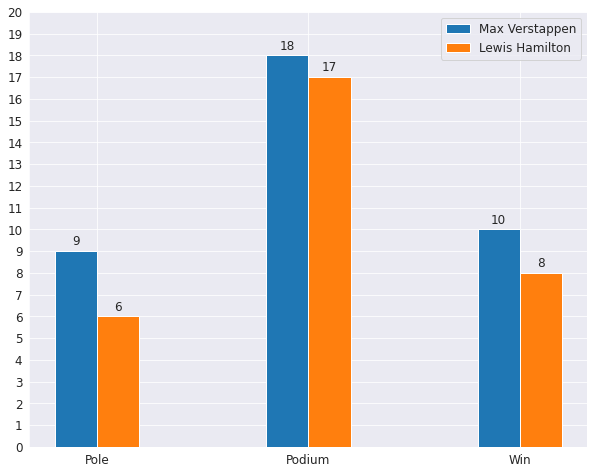

In [45]:
plt.figure(figsize=(10,8))
temp1=["Pole","Podium","Win"]
width=0.20;
temp2=np.arange(0,21)
x = np.arange(len(temp1))
plt.bar_label(plt.bar(x-width/2,Max_temp,width,label='Max Verstappen'),padding=3)
plt.bar_label(plt.bar(x+width/2,Lewis_temp,width,label='Lewis Hamilton'),padding=3);
plt.legend()
plt.xticks(x,temp1)
plt.yticks(temp2);
#plt.xlabel('Drivers');

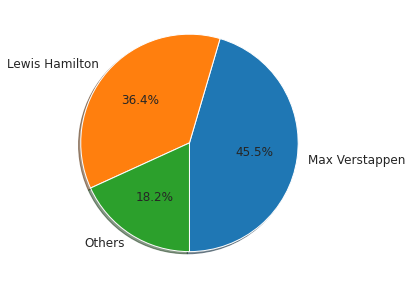

In [46]:
plt.pie([10,8,4],labels=["Max Verstappen","Lewis Hamilton","Others"],startangle=270,autopct='%1.1f%%',shadow=True);

**Conclusion:**

`Max` holds a total of `9 poles` in the whole season while `Lewis` holds `6 poles`. In view of podium, `Max` bags a total of `18 podiums`. `Hamilton` is just behind him with `17 podiums`. We can see that out of 22 races, 18 races were won by both Max and Lewis alone in which 10 won by `Max` and 8 won by `Lewis`.

##### Objective:
>Comparison of respective positions after each GP

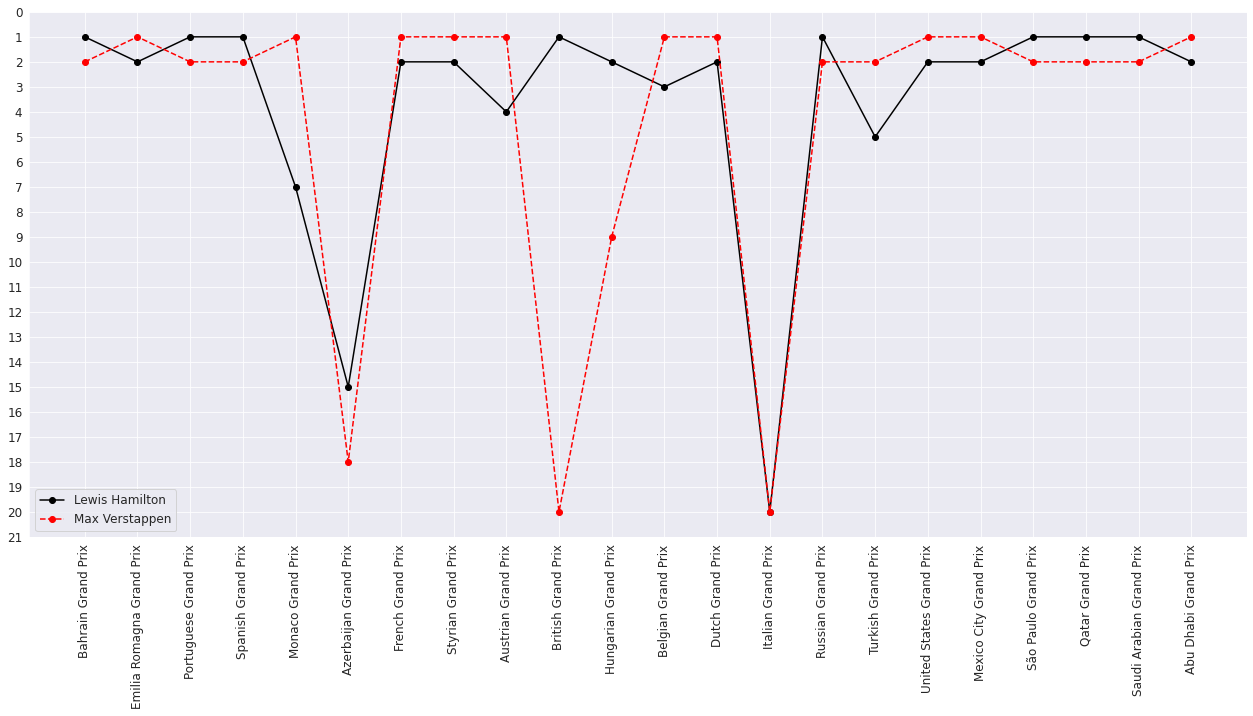

In [47]:
plt.figure(figsize=(18,8))
temp=maxvslewis_pts_df.Grand_Prix.to_list()
plt.ylim(21,0)
temp2=np.arange(0,22)
plt.plot(temp,maxvslewis_pts_df.Lewis_Pos,'k-o')
plt.plot(temp,maxvslewis_pts_df.Max_Pos,'r--o')
plt.legend(["Lewis Hamilton","Max Verstappen"]);
plt.tight_layout()
plt.yticks(temp2)
plt.xticks(temp,rotation=90);

##### Objective:
>Comparison of total points after each race

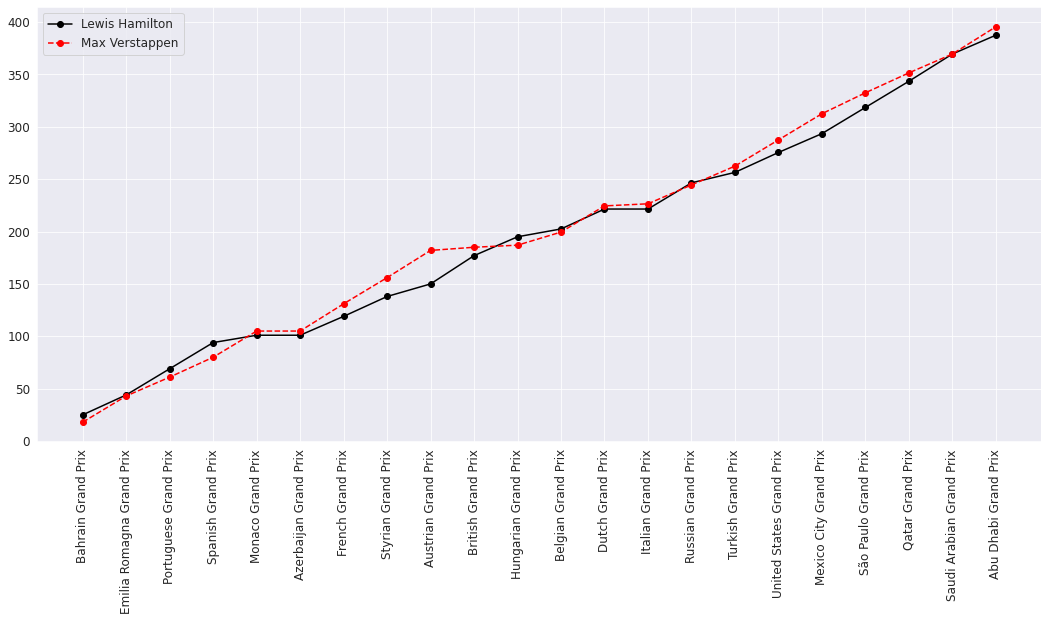

In [48]:
plt.figure(figsize=(18,8))
temp=maxvslewis_pts_df.Grand_Prix.to_list()
plt.plot(temp,maxvslewis_pts_df.Lewis_Pts_cum,'k-o')
plt.plot(temp,maxvslewis_pts_df.Max_Pts_cum,'r--o')
plt.legend(["Lewis Hamilton","Max Verstappen"])
plt.xticks(temp,rotation=90);

**Conclusion:**
> We can see that after the Saudi Arabian GP, the score was tie with 369.5 total championship points. The ultimate decider for the championship was the Abu Dhabi GP, which ends in a controversial manner with `Max Verstappen` emerging as winner of the `F1 2021 Championship` with just a margin of 8 points.

## Conclusion and Future Work

In the F1 2021 season, a total of 22 GPs were organized. The Drivers Championship goes to `Red Bull Racing-Honda` driver `Max Verstappen` and the Constructors Championship goes to `Mercedes`. While our main focus was on Max and Lewis journey throughout the season, we can extend the analysis to other drivers journey also leading to interesting insights

## References
* Dataset: `wikipedia`
    * https://en.wikipedia.org/wiki/2021_Formula_One_World_Championship
    * https://en.wikipedia.org/wiki/2021_Bahrain_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Emilia_Romagna_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Portuguese_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Spanish_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Monaco_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Azerbaijan_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_French_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Styrian_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Austrian_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_British_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Hungarian_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Belgian_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Dutch_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Italian_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Russian_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Turkish_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_United_States_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Mexico_City_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_S%C3%A3o_Paulo_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Qatar_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Saudi_Arabian_Grand_Prix
    * https://en.wikipedia.org/wiki/2021_Abu_Dhabi_Grand_Prix
* Images:
    * https://racingbabiesconnect.com/

In [66]:
project_name = "Zero2Pandas-Project-Mad-Max's-Journey-to-the-Title"

In [67]:
!pip install jovian --upgrade -q

In [68]:
import jovian

In [69]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "dudidharam12i/Zero2Pandas-Project-Mad-Max's-Journey-to-the-Title"
[jovian] Committed successfully! https://jovian.ai/dudidharam12i/zero2pandas-project-mad-maxs-journey-to-the-title


'https://jovian.ai/dudidharam12i/zero2pandas-project-mad-maxs-journey-to-the-title'